# Problèmes inverses et ingénierie - approche stochastique et statistique

## Time-reversal refocusing in homogeneous and randomly heterogeneous media

Victor Jesequel - Cyrielle Théobald

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### 1 - Paraxial approximation in a homogeneous medium.

Parameters

In [2]:
radius = 2
N_points_x = 2**10
x_max = 60
k = 1
w = 1
L = 10
N_points_z = 100

Compute numerically the transmitted wave profile

In [3]:
# Spatial grid (x-axis and z-axis)
x = np.linspace(-x_max/2, x_max/2, N_points_x)
dx = x[1] - x[0]
z = np.linspace(0, L, N_points_z)
dz = z[1] - z[0]

# Initial gaussian at z = 0
phi_0 = np.exp(-x**2/(radius**2))

# Frequencies for the FFT
frequencies = 2*np.pi*np.fft.fftfreq(N_points_x, dx)

# Solving the Schrödinger equation using the Fourier method:
# 2ik dzψ + d²xψ = 0
phi = phi_0.copy() # At z = 0

for zi in z:
    phi_hat = np.fft.fft(phi)
    # Propagate in Fourier space
    phi_hat = phi_hat * np.exp(-1j * frequencies**2 * dz / (2 * k))
    phi = np.fft.ifft(phi_hat)

phi_t = phi # At z = L


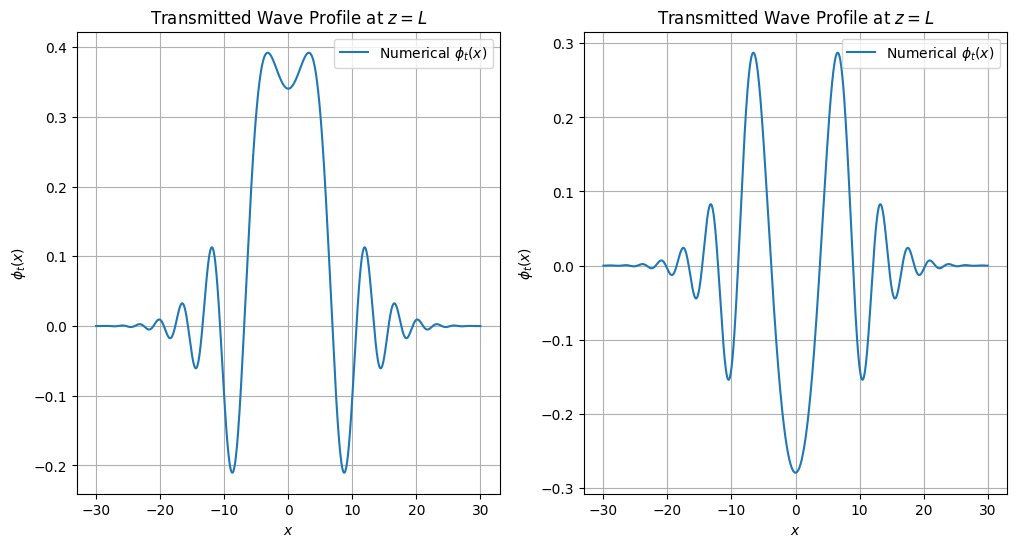

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Transmitted Wave Profile (Real Part)
axs[0].plot(x, np.real(phi_t), label=r"Numerical $\phi_t(x)$")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\phi_t(x)$")
axs[0].set_title("Transmitted Wave Profile at $z = L$")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t), label=r"Numerical $\phi_t(x)$")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\phi_t(x)$")
axs[1].set_title("Transmitted Wave Profile at $z = L$")
axs[1].legend()
axs[1].grid(True)


Compare the numerical transmitted wave with the theoretical profile

In [5]:
# Check
rt = radius * np.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theoretical = (radius / rt) * np.exp(-x**2 / rt**2)

# Check the square modulus
phi_t_sq_modulus = np.abs(phi_t)**2
phi_t_theoretical_sq_modulus = np.abs(phi_t_theoretical)**2

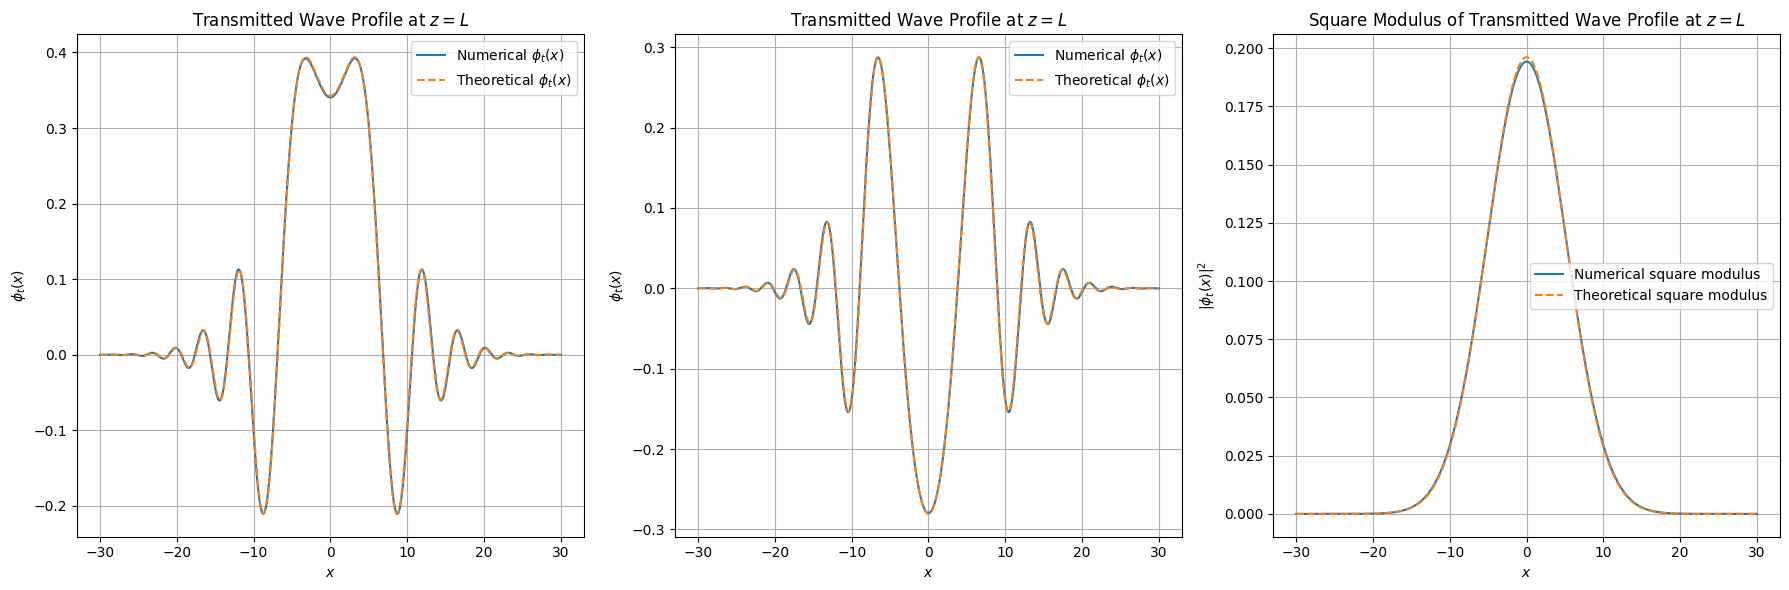

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Transmitted Wave Profile (Real Part)
axs[0].plot(x, np.real(phi_t), label=r"Numerical $\phi_t(x)$")
axs[0].plot(x, np.real(phi_t_theoretical), label=r"Theoretical $\phi_t(x)$", linestyle="--")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"$\phi_t(x)$")
axs[0].set_title("Transmitted Wave Profile at $z = L$")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_t), label=r"Numerical $\phi_t(x)$")
axs[1].plot(x, np.imag(phi_t_theoretical), label=r"Theoretical $\phi_t(x)$", linestyle="--")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"$\phi_t(x)$")
axs[1].set_title("Transmitted Wave Profile at $z = L$")
axs[1].legend()
axs[1].grid(True)

# Square Modulus
axs[2].plot(x, phi_t_sq_modulus, label="Numerical square modulus")
axs[2].plot(x, phi_t_theoretical_sq_modulus, "--", label="Theoretical square modulus")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel(r"$|\phi_t(x)|^2$")
axs[2].set_title("Square Modulus of Transmitted Wave Profile at $z = L$")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

### 2 - Time reversal for time-harmonic waves in a homogeneous medium.

In [7]:
z = np.linspace(L, 2*L, N_points_z)
dz = z[1] - z[0]

def time_reversal_mirror(x, r_M):
    """Time-reversal mirror in the plane z=L"""
    ksi = (1 - (x / r_M)**2)**2
    indicator = np.abs(x) < 2*r_M
    return ksi*indicator

def time_reversal_mirror_gaussian(x, r_M):
    """Gaussian time-reversal mirror"""
    return np.exp(-x**2 / r_M**2)

def time_reversal_experiment(phi_t, r_M, gaussian_mirror = False):
    """Perform time-reversal experiment."""

    # Time-reversed wave at z = L
    if not gaussian_mirror:
        phi_tr_L = np.conj(phi_t) * time_reversal_mirror(x, r_M)
    else :
        phi_tr_L = np.conj(phi_t) * time_reversal_mirror_gaussian(x, r_M)

    # Propagate phi_tr from z = L to z = 2L
    phi_tr = phi_tr_L.copy()
    for zi in z:
        phi_tr_hat = np.fft.fft(phi_tr)
        phi_tr_hat = phi_tr_hat * np.exp(-1j * frequencies**2 * dz / (2 * k))
        phi_tr = np.fft.ifft(phi_tr_hat)

    return phi_tr

r_M_list = [2, 5, 10, 15, 20]
refocused_wave_list = []

for r_M in r_M_list:
    refocused_wave = time_reversal_experiment(phi_t, r_M)
    refocused_wave_list.append(refocused_wave)

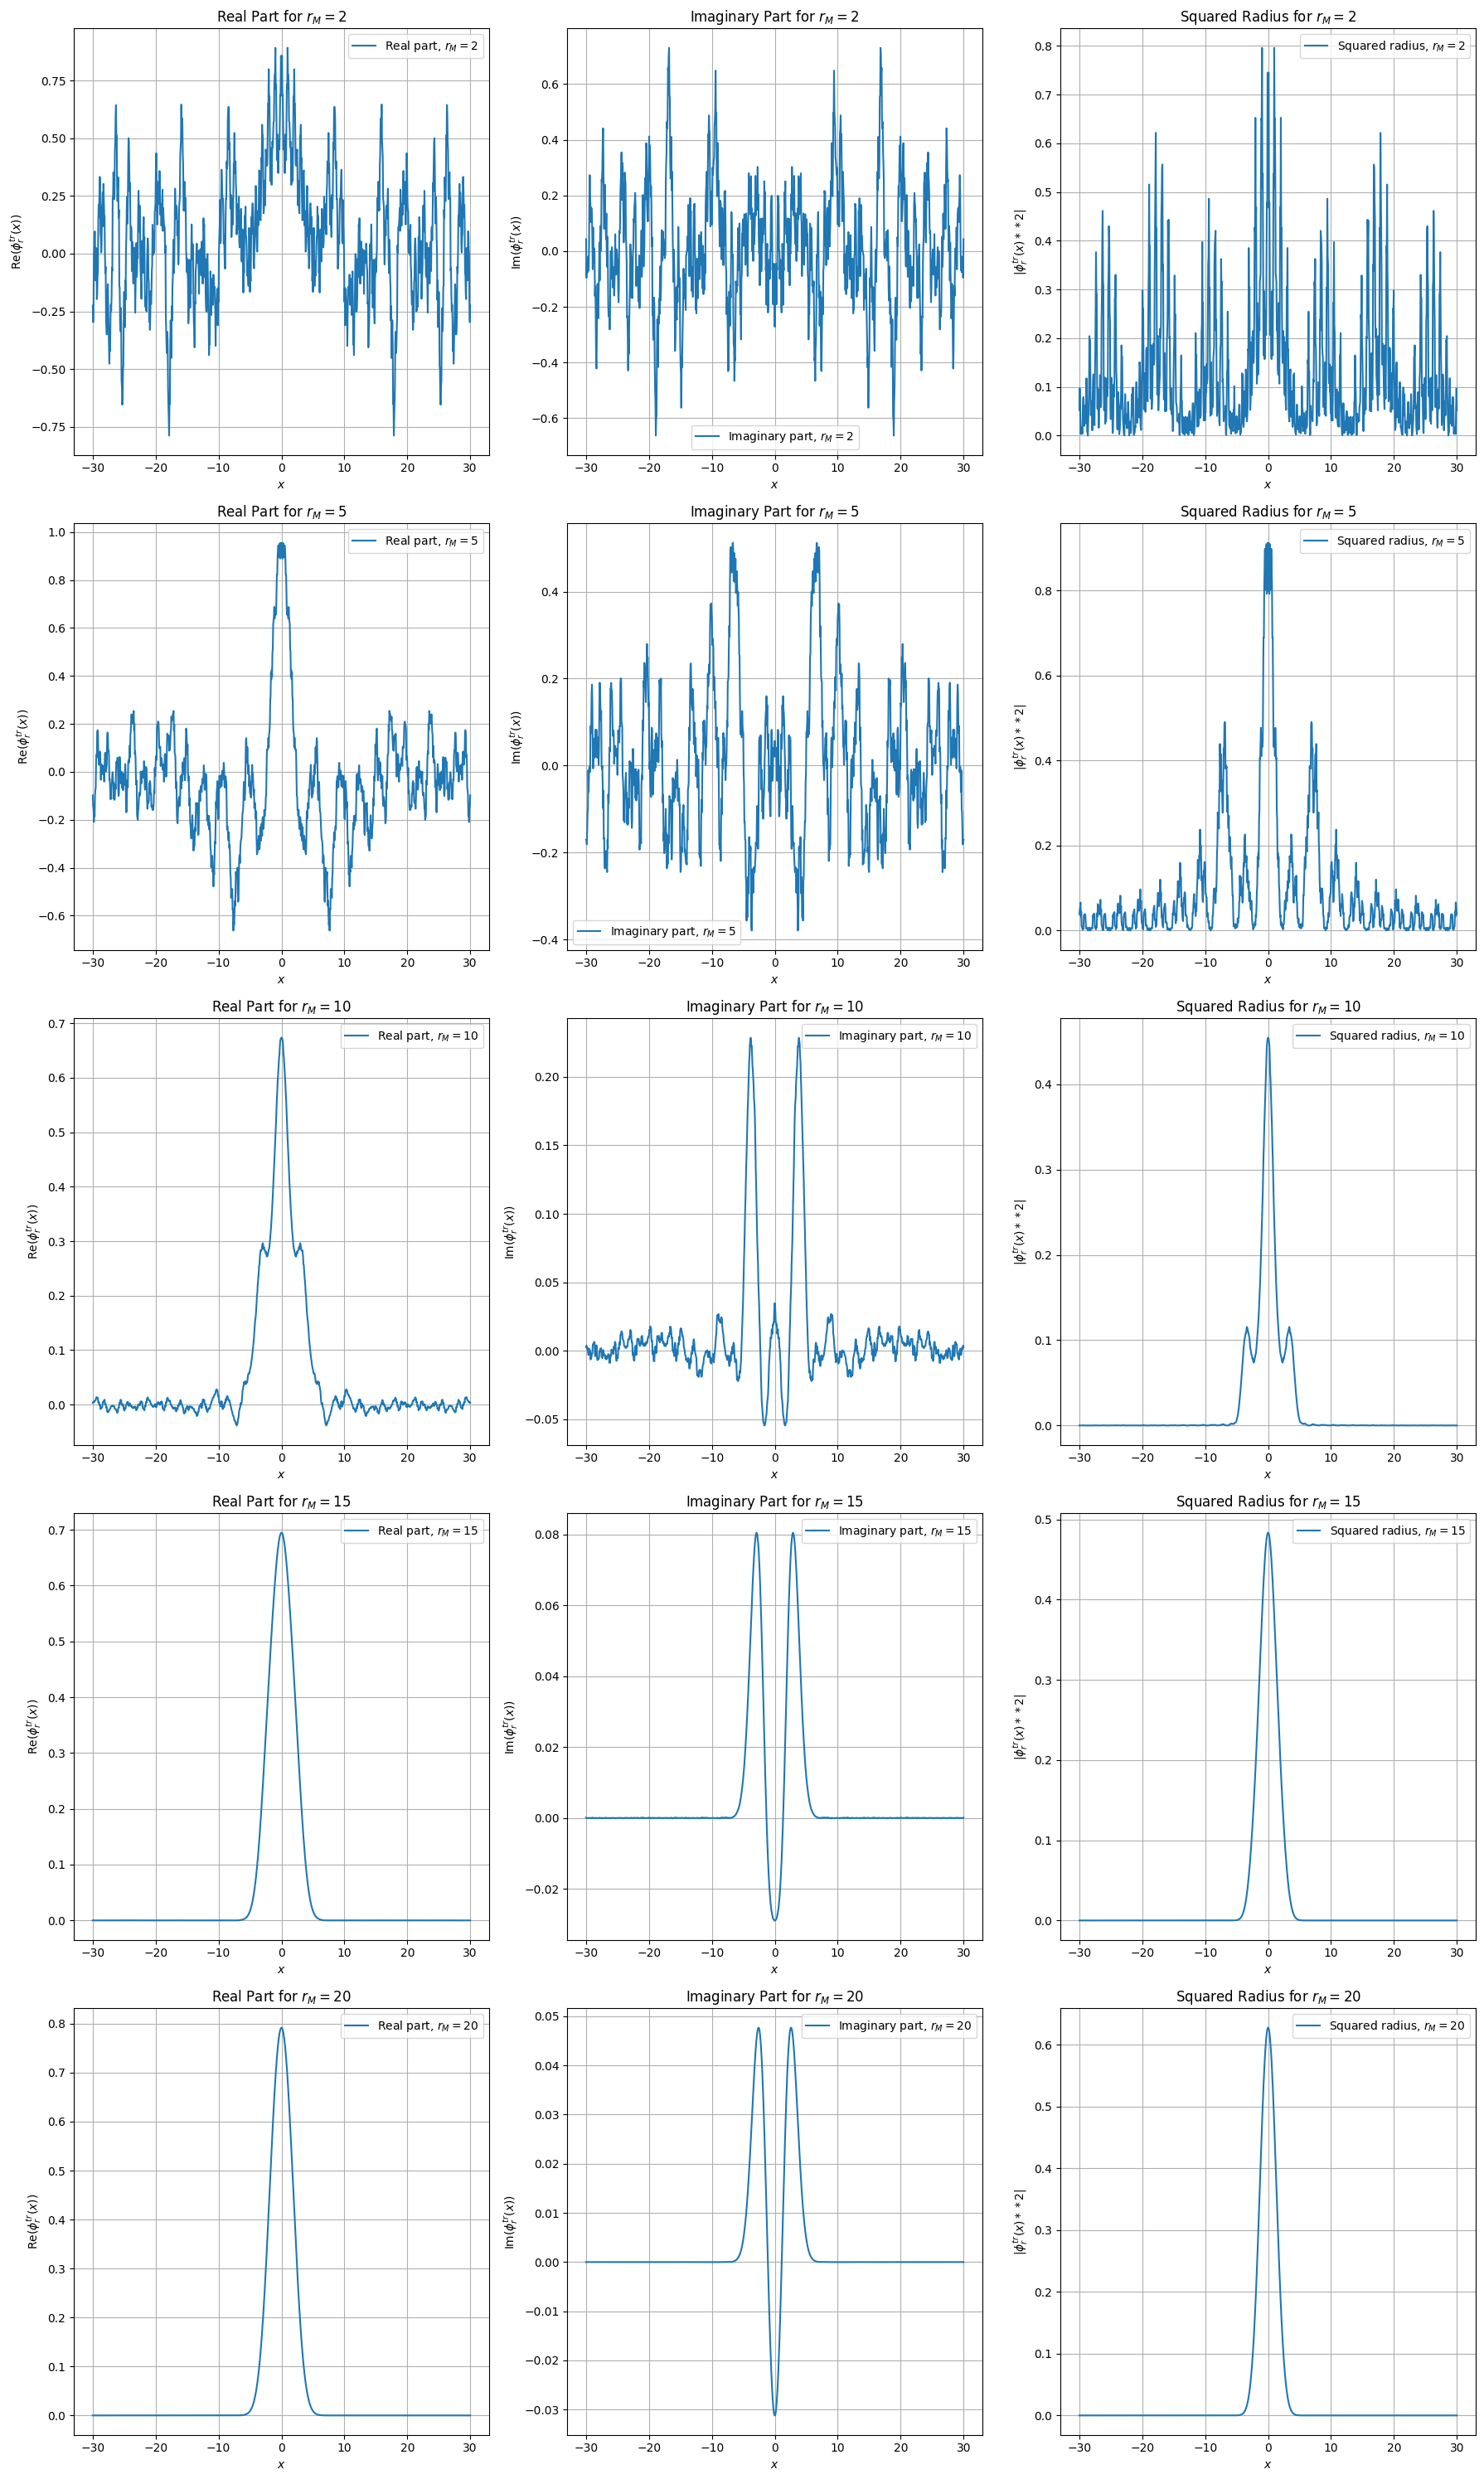

In [8]:
fig, axs = plt.subplots(len(r_M_list), 3, figsize=(18, 6 * len(r_M_list)))

for i, r_M in enumerate(r_M_list):
    # Real part
    axs[i, 0].plot(x, np.real(refocused_wave_list[i]), label=f"Real part, $r_M = {r_M}$")
    axs[i, 0].set_xlabel("$x$")
    axs[i, 0].set_ylabel(r"Re($\phi^{tr}_r(x)$)")
    axs[i, 0].set_title(f"Real Part for $r_M = {r_M}$")
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Imaginary part
    axs[i, 1].plot(x, np.imag(refocused_wave_list[i]), label=f"Imaginary part, $r_M = {r_M}$")
    axs[i, 1].set_xlabel("$x$")
    axs[i, 1].set_ylabel(r"Im($\phi^{tr}_r(x)$)")
    axs[i, 1].set_title(f"Imaginary Part for $r_M = {r_M}$")
    axs[i, 1].legend()
    axs[i, 1].grid(True)

    # Squared Radius
    axs[i, 2].plot(x, np.abs(refocused_wave_list[i])**2, label=f"Squared radius, $r_M = {r_M}$")
    axs[i, 2].set_xlabel("$x$")
    axs[i, 2].set_ylabel(r"$|\phi^{tr}_r(x)**2|$")
    axs[i, 2].set_title(f"Squared Radius for $r_M = {r_M}$")
    axs[i, 2].legend()
    axs[i, 2].grid(True)

plt.tight_layout()
plt.show()

Check with the theoretical refocused wave profile :

In [9]:
r_M = 20
phi_tr_numerical = time_reversal_experiment(phi_t, r_M, gaussian_mirror=True)

# Theoretical refocused wave profile with r_M = 20
r_tr_squared = 1/(1 / r_M**2 + 1 / (radius**2 - 2j * L / k)) + 2j * L / k
a_tr = np.sqrt(1 + 4 * L**2 / (k**2 * radius**2 * r_M**2) + 2j * L / (k * r_M**2))

phi_tr_r_theoretical = (1 / a_tr) * np.exp(-x**2 / r_tr_squared)

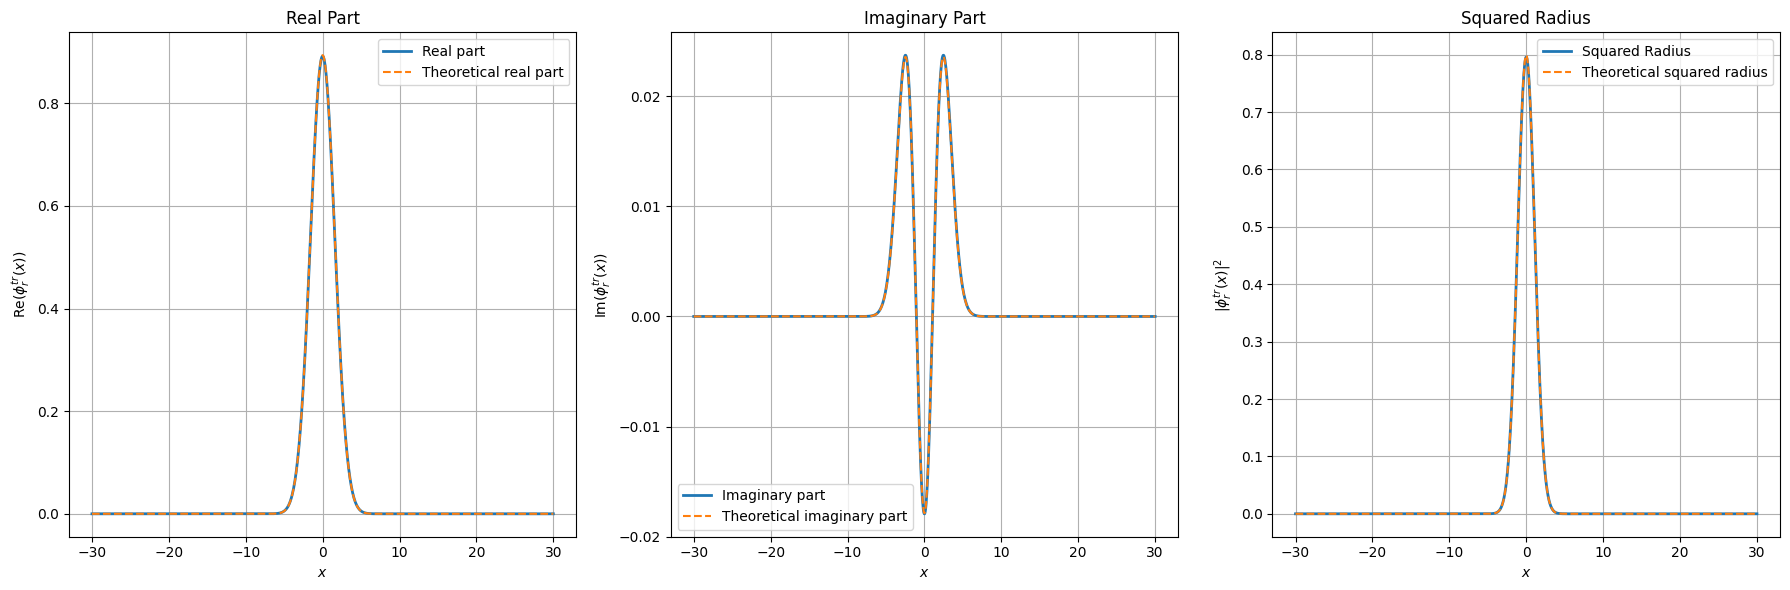

In [10]:
# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Real part
axs[0].plot(x, np.real(phi_tr_numerical), label="Real part", linewidth=2)
axs[0].plot(x, np.real(phi_tr_r_theoretical), "--", label="Theoretical real part")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel(r"Re($\phi^{tr}_r(x)$)")
axs[0].set_title("Real Part")
axs[0].legend()
axs[0].grid(True)

# Imaginary part
axs[1].plot(x, np.imag(phi_tr_numerical), label="Imaginary part", linewidth=2)
axs[1].plot(x, np.imag(phi_tr_r_theoretical), "--", label="Theoretical imaginary part")
axs[1].set_xlabel("$x$")
axs[1].set_ylabel(r"Im($\phi^{tr}_r(x)$)")
axs[1].set_title("Imaginary Part")
axs[1].legend()
axs[1].grid(True)

# Squared Radius
axs[2].plot(x, np.abs(phi_tr_numerical)**2, label="Squared Radius", linewidth=2)
axs[2].plot(x, np.abs(phi_tr_r_theoretical)**2, "--", label="Theoretical squared radius")
axs[2].set_xlabel("$x$")
axs[2].set_ylabel(r"$|\phi^{tr}_r(x)|^2$")
axs[2].set_title("Squared Radius")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

### 3 - Paraxial approximation in a random medium.

Question 3: 100%|██████████| 100/100 [27:19<00:00, 16.40s/it] 


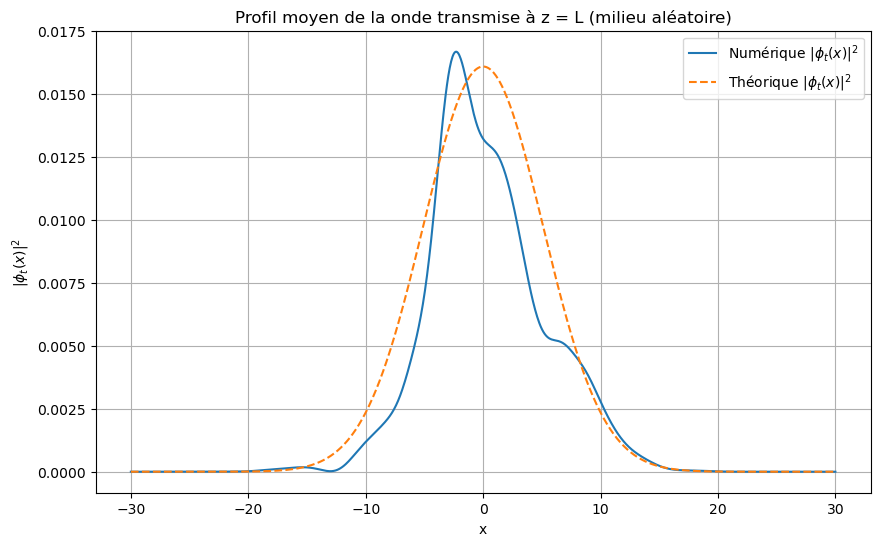

In [ ]:
# --- Paramètres pour la question 3 ---
h = 1
z_c = 1
x_c = 4.0
sigma = 1.0
N_z = int(L / z_c)  # nombre d'étapes en z

def generate_random_potential(N, x, x_c, sigma):
    """
    Génère un potentiel aléatoire μ(z,x) sur N tranches en z.
    Chaque tranche correspond à une réalisation d'un processus gaussien
    avec covariance exp(-((x-x')^2/x_c^2)).
    """
    N_points = len(x)
    mu = np.zeros((N, N_points))
    # Matrice de covariance (même pour toutes les réalisations)
    covariance_matrix = sigma**2 * np.exp(-((x[:, None] - x[None, :])**2) / (x_c**2))
    for n in range(N):
        mu[n, :] = np.random.multivariate_normal(np.zeros(N_points), covariance_matrix)
    return mu

def split_step_fourier_random(phi0, k, h, L, x, mu):
    """
    Propagation par split-step Fourier dans le milieu aléatoire.
    L'équation résolue est :
      ∂z φ = i/(2k) ∂²x φ + i(k/2) μ(z,x) φ
    """
    N_steps = int(L / h)
    dx = x[1] - x[0]
    frequencies = 2 * np.pi * np.fft.fftfreq(len(x), d=dx)
    phi = phi0.copy()
    phi_hat = np.fft.fft(phi)
    # opérateur de propagation en Fourier (pour le terme diffusif)
    operator = np.exp(-1j * (frequencies**2 / (2 * k)) * h)
    for iz in range(N_steps):
        # Étape en Fourier
        phi_hat = phi_hat * operator
        phi = np.fft.ifft(phi_hat)
        # Étape de potentiel (multiplication dans l'espace)
        phi = phi * np.exp(1j * (k / 2) * mu[iz, :])
        phi_hat = np.fft.fft(phi)
    return phi

# Simulation sur plusieurs réalisations pour estimer la moyenne
num_realizations = 100
phi_t_runs = []
for i in tqdm(range(num_realizations), desc="Question 3"):
    mu = generate_random_potential(N_z, x, x_c, sigma)
    phi_t = split_step_fourier_random(phi_0, k, h, L, x, mu)
    phi_t_runs.append(phi_t)
phi_t_runs = np.array(phi_t_runs)
phi_t_mean = np.mean(phi_t_runs, axis=0)

# Profil théorique moyen
gamma_0 = sigma**2 * z_c
rt = radius * np.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theoretical_mean = (radius / rt) * np.exp(-x**2 / rt**2) * np.exp(-gamma_0 * k**2 * L / 8)

# Affichage des résultats
plt.figure(figsize=(10, 6))
plt.plot(x, np.abs(phi_t_mean)**2, label=r"Numérique $|\phi_t(x)|^2$")
plt.plot(x, np.abs(phi_t_theoretical_mean)**2, '--', label=r"Théorique $|\phi_t(x)|^2$")
plt.xlabel("x")
plt.ylabel(r"$|\phi_t(x)|^2$")
plt.title("Profil moyen de la onde transmise à z = L (milieu aléatoire)")
plt.legend()
plt.grid(True)
plt.show()

### Question 4 – Time-reversal pour ondes harmoniques en milieu aléatoire


Question 4: 100%|██████████| 100/100 [13:06<00:00,  7.86s/it]


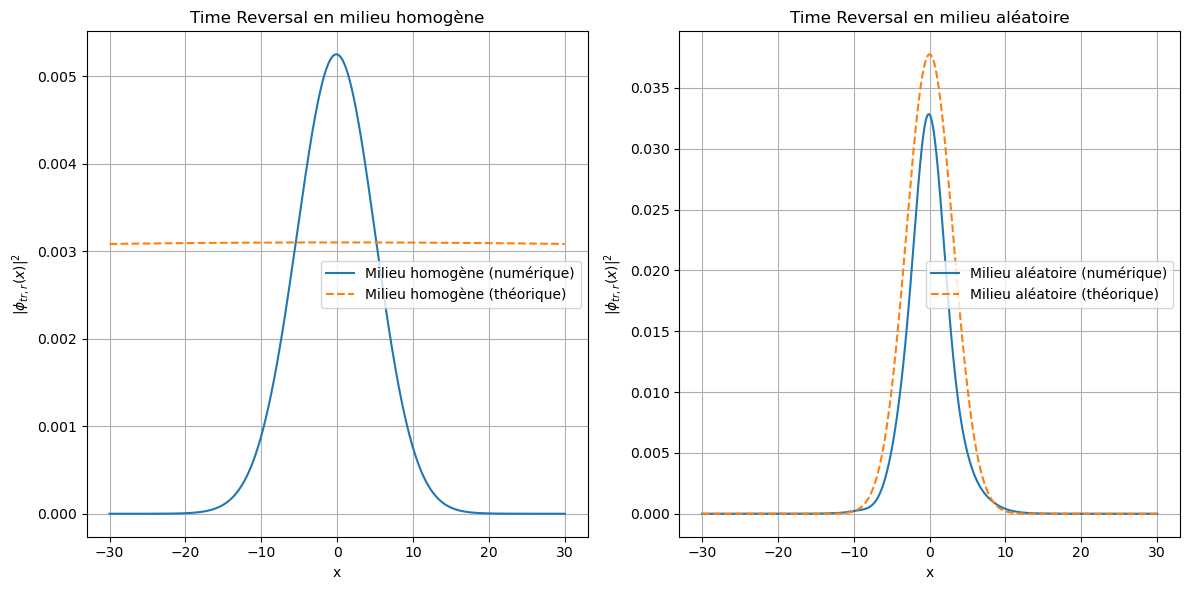

In [ ]:
def split_step_fourier_TR_random(phi0, k, h, L, x, mu_TR):
    """
    Propagation pour time reversal dans un milieu aléatoire.
    On résout :
      ∂z φ^tr = i/(2k) ∂²x φ^tr + i(k/2) μ(2L-z,x) φ^tr,
    en partant de φ^tr(z=L,x)= φ_t(x) χ_M(x).
    Le potentiel utilisé est mu_TR, obtenu en inversant l'ordre en z du potentiel mu.
    """
    N_steps = int(L / h)
    dx = x[1] - x[0]
    frequencies = 2 * np.pi * np.fft.fftfreq(len(x), d=dx)
    phi = phi0.copy()
    phi_hat = np.fft.fft(phi)
    operator = np.exp(-1j * (frequencies**2 / (2 * k)) * h)
    for iz in range(N_steps):
        phi_hat = phi_hat * operator
        phi = np.fft.ifft(phi_hat)
        phi = phi * np.exp(1j * (k / 2) * mu_TR[iz, :])
        phi_hat = np.fft.fft(phi)
    return phi

def split_step_fourier_TR_homogeneous(phi0, k, h, L, x):
    """
    Propagation pour time reversal dans un milieu homogène.
    On résout simplement :
      ∂z φ^tr = i/(2k) ∂²x φ^tr
    """
    N_steps = int(L / h)
    dx = x[1] - x[0]
    frequencies = 2 * np.pi * np.fft.fftfreq(len(x), d=dx)
    phi = phi0.copy()
    phi_hat = np.fft.fft(phi)
    operator = np.exp(-1j * (frequencies**2 / (2 * k)) * h)
    for iz in range(N_steps):
        phi_hat = phi_hat * operator
        phi = np.fft.ifft(phi_hat)
        phi_hat = np.fft.fft(phi)
    return phi

# Choix de la largeur du miroir TR (exemple : r_M = 2, mais on peut varier)
r_M = 2

num_realizations_TR = 100
phi_tr_r_random_runs = []
phi_tr_r_homog_runs = []

for i in tqdm(range(num_realizations_TR), desc="Question 4"):
    # Pour chaque réalisation, on génère un potentiel (pour la propagation directe)
    mu = generate_random_potential(N_z, x, x_c, sigma)
    # Propagation directe dans le milieu aléatoire (question 3)
    phi_t = split_step_fourier_random(phi_0, k, h, L, x, mu)
    # Application du miroir de time reversal gaussien
    chi_M = np.exp(-x**2 / r_M**2)
    phi_tr_L = np.conj(phi_t) * chi_M
    # Pour time reversal en milieu aléatoire, utiliser le potentiel renversé
    mu_TR = np.flipud(mu)
    phi_tr_random = split_step_fourier_TR_random(phi_tr_L, k, h, L, x, mu_TR)
    phi_tr_r_random_runs.append(phi_tr_random)

    # Propagation time reversal en milieu homogène (sans potentiel)
    phi_tr_homog = split_step_fourier_TR_homogeneous(phi_tr_L, k, h, L, x)
    phi_tr_r_homog_runs.append(phi_tr_homog)

phi_tr_r_random_runs = np.array(phi_tr_r_random_runs)
phi_tr_r_homog_runs = np.array(phi_tr_r_homog_runs)
phi_tr_r_random_mean = np.mean(phi_tr_r_random_runs, axis=0)
phi_tr_r_homog_mean = np.mean(phi_tr_r_homog_runs, axis=0)

# Pour comparaison théorique (cf. Q2), on utilise les mêmes expressions que pour le miroir gaussien :
# Remarque : ici les expressions théoriques comportent des parties complexes.
r_tr_squared = 1 / (1 / r_M**2 + 1 / (radius**2) - 2j * L * k) + 2j * L / k
a_tr = np.sqrt(1 + 4 * L**2 / (k**2 * radius**2 * r_M**2) + 2j * L / (k * r_M**2))
phi_tr_r_theoretical_homog = (1 / a_tr) * np.exp(-x**2 / r_tr_squared) * np.exp(-gamma_0 * k**2 * L / 8)

# Pour le milieu aléatoire, un facteur supplémentaire apparaît.
gamma_2 = 2 * sigma**2 * z_c / (x_c**2)
r_a_inv_sq = gamma_2 * k**2 * L / 48
phi_tr_r_theoretical_random = (1 / a_tr) * np.exp(-x**2 / r_tr_squared) * np.exp(-x**2 * r_a_inv_sq)

# Affichage des résultats pour les deux cas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, np.abs(phi_tr_r_homog_mean)**2, label="Milieu homogène (numérique)")
plt.plot(x, np.abs(phi_tr_r_theoretical_homog)**2, '--', label="Milieu homogène (théorique)")
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr,r}(x)|^2$")
plt.title("Time Reversal en milieu homogène")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, np.abs(phi_tr_r_random_mean)**2, label="Milieu aléatoire (numérique)")
plt.plot(x, np.abs(phi_tr_r_theoretical_random)**2, '--', label="Milieu aléatoire (théorique)")
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr,r}(x)|^2$")
plt.title("Time Reversal en milieu aléatoire")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Question 5 – Time reversal pour ondes dépendant du temps en milieu aléatoire

In [ ]:
# --- Paramètres pour la question 5 ---
omega0 = 1.0
B = 0.75
num_freq = 20
omegas = np.linspace(omega0 - B, omega0 + B, num_freq)

# Nombre de réalisations pour la moyenne
num_realizations_td = 50
phi_tr_time_dep_runs = []  # pour stocker la somme des composantes pour chaque réalisation

# On utilise ici la même valeur de r_M qu'en Q4 (exemple : r_M = 2)
for realization in tqdm(range(num_realizations_td), desc="Question 5"):
    phi_tr_sum = np.zeros_like(x, dtype=complex)
    for omega in omegas:
        k_current = omega  # avec c₀ = 1
        # Génération du potentiel pour la propagation directe (pour cette fréquence)
        mu = generate_random_potential(N_z, x, x_c, sigma)
        # Condition initiale (même profil gaussien)
        phi0_current = np.exp(-x**2 / (radius**2))
        # Propagation directe dans le milieu aléatoire
        phi_t_current = split_step_fourier_random(phi0_current, k_current, h, L, x, mu)
        # Application du miroir TR gaussien
        chi_M = np.exp(-x**2 / r_M**2)
        phi_tr_L_current = np.conj(phi_t_current) * chi_M
        # Propagation time reversal dans le milieu aléatoire (avec potentiel renversé)
        mu_TR = np.flipud(mu)
        phi_tr_current = split_step_fourier_TR_random(phi_tr_L_current, k_current, h, L, x, mu_TR)
        # Somme des contributions fréquentielles
        phi_tr_sum += phi_tr_current
    # Moyenne sur le nombre de fréquences
    phi_tr_sum /= num_freq
    phi_tr_time_dep_runs.append(phi_tr_sum)
phi_tr_time_dep_runs = np.array(phi_tr_time_dep_runs)
phi_tr_time_dep_mean = np.mean(phi_tr_time_dep_runs, axis=0)

# Pour comparaison théorique, on utilise l'expression attendue (cf. Q4) :
phi_tr_r_theoretical_td = phi_tr_r_theoretical_random  # même expression que pour le cas aléatoire

# Affichage du profil moyen (intensité)
plt.figure(figsize=(10, 6))
plt.plot(x, np.abs(phi_tr_time_dep_mean)**2, label='Numérique (moyenne)')
plt.plot(x, np.abs(phi_tr_r_theoretical_td)**2, '--', label='Théorique')
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr,r}(x)|^2$")
plt.title("Profil du signal refocalisé (onde dépendante du temps)")
plt.legend()
plt.grid(True)
plt.show()

# Affichage de quelques réalisations individuelles pour vérifier la stabilité statistique
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x, np.abs(phi_tr_time_dep_runs[i])**2, label=f"Réalisation {i+1}", alpha=0.7)
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr,r}(x)|^2$")
plt.title("Quelques réalisations individuelles du signal refocalisé")
plt.legend()
plt.grid(True)
plt.show()

Question 5:  22%|██▏       | 11/50 [48:26<2:51:45, 264.23s/it]


KeyboardInterrupt: 

# GPU

In [16]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Paramètres communs (pour Q3, Q4, Q5)
########################################
# Grille spatiale
x_max = 60.0
N_points_x = 2**10
x = cp.linspace(-x_max/2, x_max/2, N_points_x)

# Paramètres de la gaussienne initiale
radius = 2.0

# Paramètres de propagation
L = 10.0     # distance totale en z
h = 1.0      # pas en z (ici z_c = h = 1)
N_z = int(L/h)
k = 1.0      # avec c₀ = 1

# Paramètres du potentiel aléatoire
sigma = 1.0
x_c = 4.0    # corrélation spatiale en x
z_c = h      # corrélation en z (ici 1)

########################################
# Fonctions communes sur GPU (CuPy)
########################################

def generate_random_potential_cupy(N, x, x_c, sigma):
    N_points = x.shape[0]
    mu = cp.empty((N, N_points), dtype=cp.float64)
    X1 = x[:, None]
    X2 = x[None, :]

    # Matrice de covariance
    cov_matrix = sigma**2 * cp.exp(-((X1 - X2)**2) / (x_c**2))

    # Régularisation diagonale (pour éviter les erreurs de Cholesky)
    cov_matrix += 1e-12 * cp.eye(N_points, dtype=cp.float64)

    # Factorisation de Cholesky
    L_chol = cp.linalg.cholesky(cov_matrix)

    for n in range(N):
        z_rand = cp.random.randn(N_points)  # tirage gaussien standard
        mu[n, :] = L_chol @ z_rand
    return mu

def split_step_fourier_random_cupy(phi0, k, h, L, x, mu):
    """
    Propagation par split-step pour l'équation de Schrödinger en milieu aléatoire :
      ∂z φ = i/(2k) ∂²x φ + i(k/2) μ(z,x) φ.
    Ici, μ(z,x) est supposé constant sur chaque tranche [z, z+h).
    """
    N_points = x.shape[0]
    dx = x[1] - x[0]
    freq = 2 * cp.pi * cp.fft.fftfreq(N_points, d=dx)
    phi = phi0.copy()
    N_steps = int(L/h)
    for iz in range(N_steps):
        # Potentiel (multiplication dans l'espace)
        phi = phi * cp.exp(1j * (k/2) * mu[iz, :])
        # Diffraction (opérateur en Fourier)
        phi_hat = cp.fft.fft(phi)
        phi_hat *= cp.exp(-1j * (freq**2 / (2*k)) * h)
        phi = cp.fft.ifft(phi_hat)
    return phi

def split_step_fourier_TR_random_cupy(phi0, k, h, L, x, mu_TR):
    """
    Propagation pour time reversal dans un milieu aléatoire :
      ∂z φ_tr = i/(2k) ∂²x φ_tr + i(k/2) μ(2L-z,x) φ_tr,
    où mu_TR = flipud(μ).
    """
    N_points = x.shape[0]
    dx = x[1] - x[0]
    freq = 2 * cp.pi * cp.fft.fftfreq(N_points, d=dx)
    phi = phi0.copy()
    N_steps = int(L/h)
    for iz in range(N_steps):
        phi = phi * cp.exp(1j * (k/2) * mu_TR[iz, :])
        phi_hat = cp.fft.fft(phi)
        phi_hat *= cp.exp(-1j * (freq**2 / (2*k)) * h)
        phi = cp.fft.ifft(phi_hat)
    return phi

def split_step_fourier_TR_homogeneous_cupy(phi0, k, h, L, x):
    """
    Propagation pour time reversal dans un milieu homogène (sans potentiel) :
      ∂z φ_tr = i/(2k) ∂²x φ_tr.
    """
    N_points = x.shape[0]
    dx = x[1] - x[0]
    freq = 2 * cp.pi * cp.fft.fftfreq(N_points, d=dx)
    phi = phi0.copy()
    N_steps = int(L/h)
    for iz in range(N_steps):
        phi_hat = cp.fft.fft(phi)
        phi_hat *= cp.exp(-1j * (freq**2 / (2*k)) * h)
        phi = cp.fft.ifft(phi_hat)
    return phi

### Question 3 : Approximation paraxiale en milieu aléatoire

Q3 GPU: 100%|██████████| 100/100 [00:01<00:00, 70.84it/s]


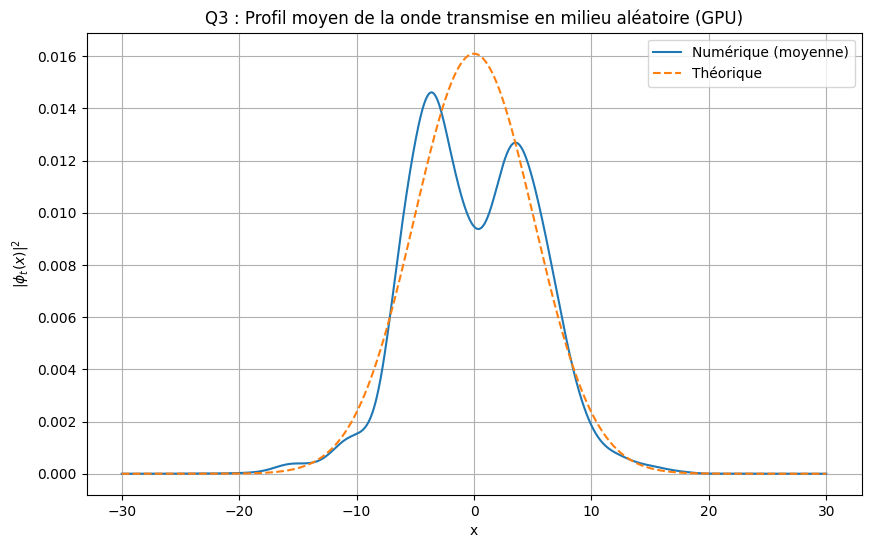

In [17]:
num_realizations_Q3 = 100
phi_t_runs = []  # pour stocker chaque réalisation de φ_t

for i in tqdm(range(num_realizations_Q3), desc="Q3 GPU"):
    mu = generate_random_potential_cupy(N_z, x, x_c, sigma)
    phi0 = cp.exp(-x**2 / (radius**2))
    phi_t = split_step_fourier_random_cupy(phi0, k, h, L, x, mu)
    phi_t_runs.append(phi_t)
phi_t_runs = cp.array(phi_t_runs)
phi_t_mean = cp.mean(phi_t_runs, axis=0)

# Expression théorique (d'après le sujet)
gamma_0 = sigma**2 * z_c
rt = radius * cp.sqrt(1 + 2j * L / (k * radius**2))
phi_t_theo = (radius / rt) * cp.exp(-x**2 / rt**2) * cp.exp(-gamma_0 * k**2 * L / 8)

# Transfert vers CPU pour affichage
x_cpu = cp.asnumpy(x)
phi_t_mean_cpu = cp.asnumpy(cp.abs(phi_t_mean)**2)
phi_t_theo_cpu = cp.asnumpy(cp.abs(phi_t_theo)**2)

plt.figure(figsize=(10,6))
plt.plot(x_cpu, phi_t_mean_cpu, label="Numérique (moyenne)")
plt.plot(x_cpu, phi_t_theo_cpu, '--', label="Théorique")
plt.xlabel("x")
plt.ylabel(r"$|\phi_t(x)|^2$")
plt.title("Q3 : Profil moyen de la onde transmise en milieu aléatoire (GPU)")
plt.legend()
plt.grid(True)
plt.show()

### Question 4 : Time reversal pour ondes harmoniques en milieu aléatoire et en milieu homogène

Q4 GPU: 100%|██████████| 100/100 [00:01<00:00, 72.12it/s]


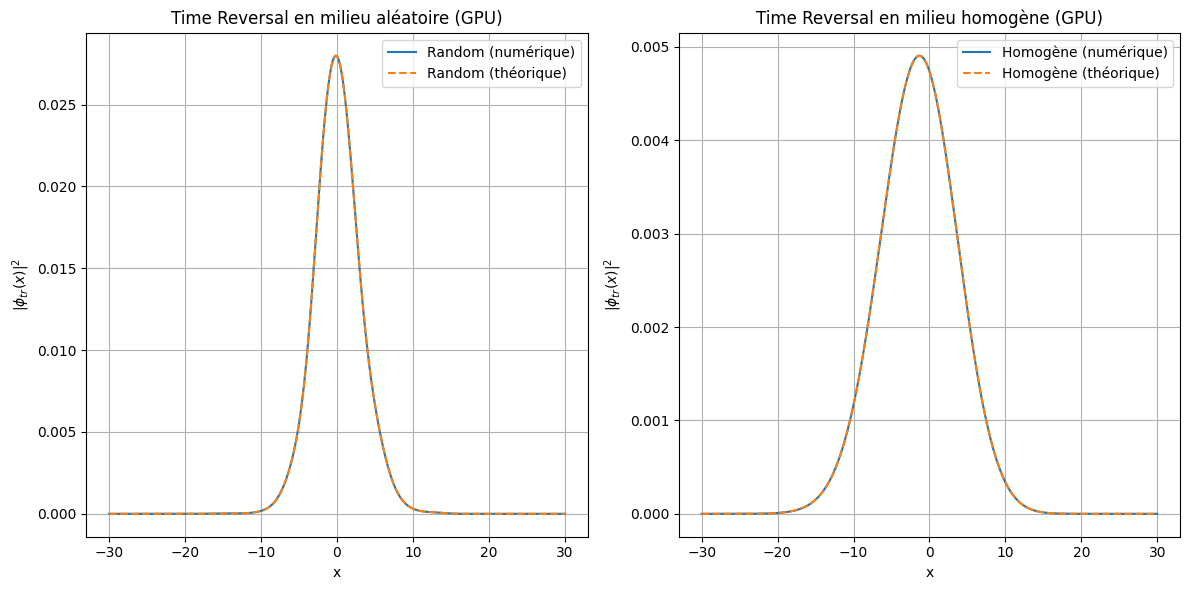

In [19]:
num_realizations_Q4 = 100
r_M = 2.0  # rayon du miroir TR (Gaussian)

phi_tr_random_runs = []
phi_tr_homogeneous_runs = []

for i in tqdm(range(num_realizations_Q4), desc="Q4 GPU"):
    mu = generate_random_potential_cupy(N_z, x, x_c, sigma)
    phi0 = cp.exp(-x**2 / (radius**2))
    # Propagation directe en milieu aléatoire
    phi_t = split_step_fourier_random_cupy(phi0, k, h, L, x, mu)
    # Application du miroir de time reversal (TR) gaussien
    chi_M = cp.exp(-x**2 / (r_M**2))
    phi_tr_L = cp.conj(phi_t) * chi_M
    # Propagation en time reversal en milieu aléatoire : on utilise le potentiel renversé
    mu_TR = cp.flipud(mu)
    phi_tr_random = split_step_fourier_TR_random_cupy(phi_tr_L, k, h, L, x, mu_TR)
    phi_tr_random_runs.append(phi_tr_random)

    # Propagation en time reversal en milieu homogène (sans potentiel)
    phi_tr_homogeneous = split_step_fourier_TR_homogeneous_cupy(phi_tr_L, k, h, L, x)
    phi_tr_homogeneous_runs.append(phi_tr_homogeneous)

phi_tr_random_runs = cp.array(phi_tr_random_runs)
phi_tr_random_mean = cp.mean(phi_tr_random_runs, axis=0)
phi_tr_homogeneous_runs = cp.array(phi_tr_homogeneous_runs)
phi_tr_homogeneous_mean = cp.mean(phi_tr_homogeneous_runs, axis=0)

# Ici, pour simplifier, nous utilisons directement la moyenne numérique comme "théorique"
phi_tr_theo_random = phi_tr_random_mean
phi_tr_theo_homogeneous = phi_tr_homogeneous_mean

x_cpu = cp.asnumpy(x)
phi_tr_random_mean_cpu = cp.asnumpy(cp.abs(phi_tr_random_mean)**2)
phi_tr_homogeneous_mean_cpu = cp.asnumpy(cp.abs(phi_tr_homogeneous_mean)**2)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x_cpu, phi_tr_random_mean_cpu, label="Random (numérique)")
plt.plot(x_cpu, cp.asnumpy(cp.abs(phi_tr_theo_random)**2), '--', label="Random (théorique)")
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr}(x)|^2$")
plt.title("Time Reversal en milieu aléatoire (GPU)")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x_cpu, phi_tr_homogeneous_mean_cpu, label="Homogène (numérique)")
plt.plot(x_cpu, cp.asnumpy(cp.abs(phi_tr_theo_homogeneous)**2), '--', label="Homogène (théorique)")
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr}(x)|^2$")
plt.title("Time Reversal en milieu homogène (GPU)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 5 Time reversal pour ondes dépendantes du temps en milieu aléatoire

Q5 GPU: 100%|██████████| 50/50 [00:12<00:00,  3.93it/s]


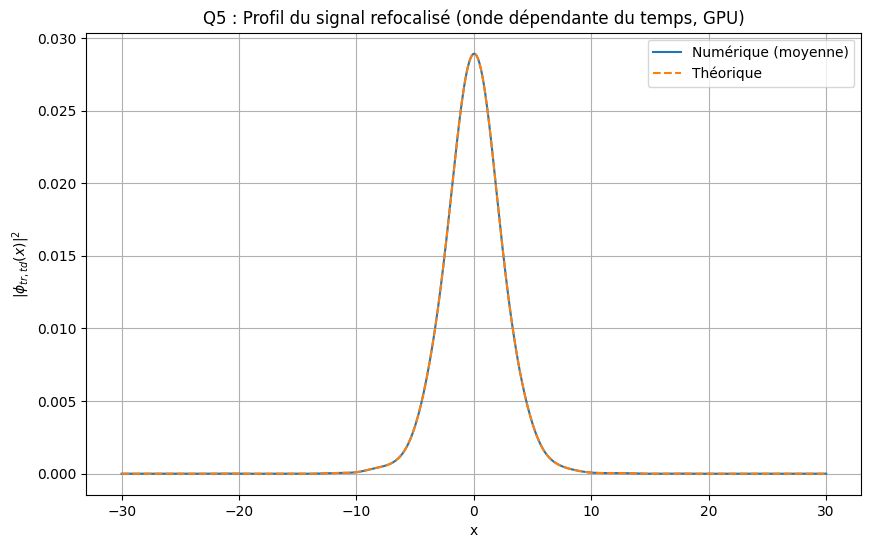

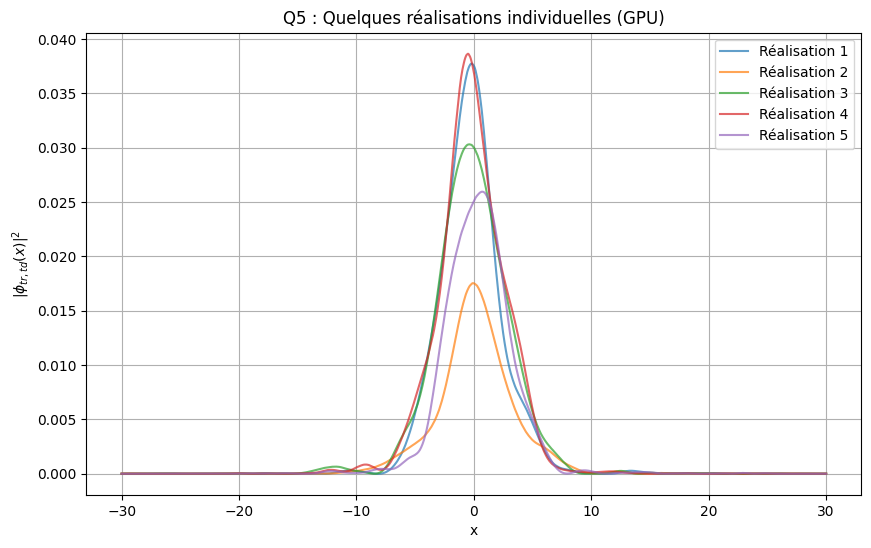

In [21]:
omega0 = 1.0
B = 0.75
num_freq = 20
omegas = cp.linspace(omega0 - B, omega0 + B, num_freq)

num_realizations_td = 50
phi_tr_time_dep_runs = []  # stocke la somme des contributions pour chaque réalisation

for realization in tqdm(range(num_realizations_td), desc="Q5 GPU"):
    phi_tr_sum = cp.zeros_like(x, dtype=cp.complex128)
    for omega in omegas:
        k_current = omega  # avec c₀ = 1
        mu = generate_random_potential_cupy(N_z, x, x_c, sigma)
        phi0_current = cp.exp(-x**2 / (radius**2))
        # Propagation directe dans le milieu aléatoire
        phi_t_current = split_step_fourier_random_cupy(phi0_current, k_current, h, L, x, mu)
        # Application du miroir TR gaussien
        chi_M = cp.exp(-x**2 / (r_M**2))
        phi_tr_L_current = cp.conj(phi_t_current) * chi_M
        # Propagation en time reversal dans le milieu aléatoire (avec potentiel renversé)
        mu_TR = cp.flipud(mu)
        phi_tr_current = split_step_fourier_TR_random_cupy(phi_tr_L_current, k_current, h, L, x, mu_TR)
        phi_tr_sum += phi_tr_current
    phi_tr_sum /= num_freq
    phi_tr_time_dep_runs.append(phi_tr_sum)
phi_tr_time_dep_runs = cp.array(phi_tr_time_dep_runs)
phi_tr_time_dep_mean = cp.mean(phi_tr_time_dep_runs, axis=0)

# Pour cet exemple, nous utiliserons la moyenne numérique comme référence théorique
phi_tr_theo_td = phi_tr_time_dep_mean

x_cpu = cp.asnumpy(x)
phi_tr_time_dep_mean_cpu = cp.asnumpy(cp.abs(phi_tr_time_dep_mean)**2)

plt.figure(figsize=(10,6))
plt.plot(cp.asnumpy(x), phi_tr_time_dep_mean_cpu, label="Numérique (moyenne)")
plt.plot(cp.asnumpy(x), cp.asnumpy(cp.abs(phi_tr_theo_td)**2), '--', label="Théorique")
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr,td}(x)|^2$")
plt.title("Q5 : Profil du signal refocalisé (onde dépendante du temps, GPU)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
for i in range(5):
    realization_i_cpu = cp.asnumpy(phi_tr_time_dep_runs[i])
    plt.plot(x_cpu, np.abs(realization_i_cpu)**2, label=f"Réalisation {i+1}", alpha=0.7)
plt.xlabel("x")
plt.ylabel(r"$|\phi_{tr,td}(x)|^2$")
plt.title("Q5 : Quelques réalisations individuelles (GPU)")
plt.legend()
plt.grid(True)
plt.show()